In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
from keras.layers import Dense



In [55]:

import tensorflow as tf
from tensorflow.keras.layers import Dense

In [56]:
train_data=pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
train_data=train_data.replace(['female','male'],[0,1])
train_data=train_data.replace(['S','C','Q'],[0,1,2])
tarin_data=train_data.fillna(0,inplace=True)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0.0


In [58]:
Y_train=train_data[['Survived']]
X_train=train_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
Y_train=np.array(Y_train)
X_train=np.array(X_train)
print(X_train.shape,Y_train.shape)

(891, 7) (891, 1)


In [59]:

test_data = pd.read_csv('test.csv')
test_data = test_data.replace(['female', 'male'], [0, 1])
test_data = test_data.replace(['S', 'C', 'Q'], [0, 1, 2])
test_data = test_data.fillna(0)
X_test = test_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
test = pd.read_csv('gender_submission.csv')
Y_test = test[['Survived']]

X_test.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [60]:

print(X_test.shape,Y_test.shape)

(418, 7) (418, 1)


In [61]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).shuffle(10).batch(8)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(8)

In [62]:

model=tf.keras.models.Sequential([
                                  tf.keras.layers.Dense(6,activation='relu'),
                                  tf.keras.layers.Dense(16,activation='relu'),
                                  tf.keras.layers.Dense(2,activation='softmax')
])



In [63]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])



In [64]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
output=model.fit(X_train,Y_train,epochs=200)

(891, 7) (891, 1)
(418, 7) (418, 1)
Epoch 1/200


28/28 [==============================] - 2s 2ms/step - loss: 2.7293 - accuracy: 0.4186
Epoch 2/200
28/28 [==============================] - 0s 2ms/step - loss: 1.1738 - accuracy: 0.4456
Epoch 3/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.6465
Epoch 4/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6572 - accuracy: 0.6532
Epoch 5/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6383 - accuracy: 0.6566
Epoch 6/200
28/28 [==============================] - 0s 3ms/step - loss: 0.6274 - accuracy: 0.6532
Epoch 7/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6190 - accuracy: 0.6465
Epoch 8/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6099 - accuracy: 0.6465
Epoch 9/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6044 - accuracy: 0.6498
Epoch 10/200
28/28 [==============================] - 0s 3ms/step - loss: 0.5993 - accuracy: 0.6498
Epoch 11/200
28/28 [=

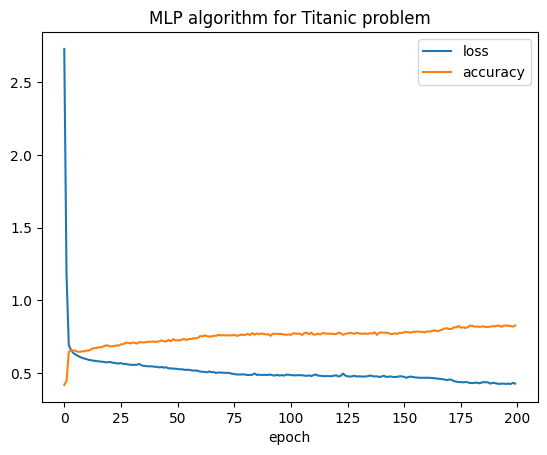

In [65]:
plt.plot(output.history['loss'])
plt.plot(output.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.title('MLP algorithm for Titanic problem')
plt.show()

In [66]:

model.save('titanic.h5')

/home/parisa/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [67]:
model=tf.keras.models.load_model('titanic.h5')

In [68]:

model.evaluate(X_test,Y_test)


14/14 [==============================] - 0s 3ms/step - loss: 0.3485 - accuracy: 0.8708


[0.34846705198287964, 0.8708133697509766]

In [69]:
#predict if the passenger survived
pred=[[2,0,34,0,1,54.3900,2]]
y_pred=np.argmax(model.predict(pred))
if y_pred==1:
  print('Survived')
else:
    print('Not Survived')  


1/1 [==============================] - 0s 123ms/step
Survived


In [70]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.d1 = Dense(6, activation = "relu")
        self.d2 = Dense(16, activation = "relu")
        self.d3 = Dense(2 ,activation = "softmax")

    def call(self, x):
        x = self.d1(x)
        x = self.d2(x)
        x = self.d3(x)

        return x

model = MyModel()

In [71]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
optimizer = tf.keras.optimizers.Adam()

In [72]:
train_loss = tf.keras.metrics.Mean()
test_loss = tf.keras.metrics.Mean()

train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

In [73]:
@tf.function
def train(X_train, Y_train):
  with tf.GradientTape() as tape:
      pred = model(X_train)
      loss = loss_function(Y_train, pred)

  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  train_loss(loss)
  train_accuracy(Y_train, pred)

In [74]:
@tf.function
def test(X_test, Y_test):
  pred = model(X_test)
  loss = loss_function(Y_test, pred)
  test_loss(loss)
  test_accuracy(Y_test, pred)

In [75]:
epochs = 50

for epoch in tqdm(range(epochs)):
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  #train
  for X_train, Y_train in train_dataset:
    train(X_train, Y_train)


  #test
  for X_test,Y_test in test_dataset:
    test(X_test, Y_test)

  print(f"Epoch : {epoch+1} , Train Loss : {train_loss.result()} , Train Acuuracy : {train_accuracy.result()} , Test Loss : {test_loss.result()} , Test Accuracy : {test_accuracy.result()}")

  0%|          | 0/50 [00:00<?, ?it/s]

/home/parisa/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
  2%|▏         | 1/50 [00:02<02:26,  2.98s/it]

Epoch : 1 , Train Loss : 1.176470398902893 , Train Acuuracy : 0.5140292048454285 , Test Loss : 0.6413077712059021 , Test Accuracy : 0.6363636255264282


  4%|▍         | 2/50 [00:03<01:11,  1.49s/it]

Epoch : 2 , Train Loss : 0.6228109002113342 , Train Acuuracy : 0.650954008102417 , Test Loss : 0.6124295592308044 , Test Accuracy : 0.6483253836631775


  6%|▌         | 3/50 [00:03<00:45,  1.03it/s]

Epoch : 3 , Train Loss : 0.5919656753540039 , Train Acuuracy : 0.683501660823822 , Test Loss : 0.6121317148208618 , Test Accuracy : 0.6578947305679321


  8%|▊         | 4/50 [00:04<00:32,  1.41it/s]

Epoch : 4 , Train Loss : 0.5850586891174316 , Train Acuuracy : 0.6879910230636597 , Test Loss : 0.6308020353317261 , Test Accuracy : 0.6507176756858826


 10%|█         | 5/50 [00:04<00:25,  1.77it/s]

Epoch : 5 , Train Loss : 0.5888320207595825 , Train Acuuracy : 0.6936026811599731 , Test Loss : 0.5966229438781738 , Test Accuracy : 0.6626794338226318


 12%|█▏        | 6/50 [00:04<00:23,  1.86it/s]

Epoch : 6 , Train Loss : 0.5775560736656189 , Train Acuuracy : 0.7037037014961243 , Test Loss : 0.5906170606613159 , Test Accuracy : 0.6889952421188354


 14%|█▍        | 7/50 [00:05<00:21,  1.99it/s]

Epoch : 7 , Train Loss : 0.5740108489990234 , Train Acuuracy : 0.7014590501785278 , Test Loss : 0.5851025581359863 , Test Accuracy : 0.6842105388641357


 16%|█▌        | 8/50 [00:05<00:19,  2.14it/s]

Epoch : 8 , Train Loss : 0.5688415765762329 , Train Acuuracy : 0.6992143392562866 , Test Loss : 0.5771875381469727 , Test Accuracy : 0.6889952421188354


 18%|█▊        | 9/50 [00:06<00:18,  2.21it/s]

Epoch : 9 , Train Loss : 0.5654348731040955 , Train Acuuracy : 0.7025813460350037 , Test Loss : 0.5698189735412598 , Test Accuracy : 0.6913875341415405


 20%|██        | 10/50 [00:06<00:16,  2.47it/s]

Epoch : 10 , Train Loss : 0.5623764395713806 , Train Acuuracy : 0.7025813460350037 , Test Loss : 0.564181387424469 , Test Accuracy : 0.6937798857688904


 22%|██▏       | 11/50 [00:06<00:14,  2.66it/s]

Epoch : 11 , Train Loss : 0.5602074861526489 , Train Acuuracy : 0.7070707082748413 , Test Loss : 0.5563353896141052 , Test Accuracy : 0.6985645890235901


 24%|██▍       | 12/50 [00:07<00:13,  2.87it/s]

Epoch : 12 , Train Loss : 0.5597568154335022 , Train Acuuracy : 0.7070707082748413 , Test Loss : 0.5504640340805054 , Test Accuracy : 0.7009569406509399


 26%|██▌       | 13/50 [00:07<00:13,  2.83it/s]

Epoch : 13 , Train Loss : 0.5547647476196289 , Train Acuuracy : 0.7093153595924377 , Test Loss : 0.5449001789093018 , Test Accuracy : 0.7009569406509399


 28%|██▊       | 14/50 [00:07<00:12,  2.91it/s]

Epoch : 14 , Train Loss : 0.5526461601257324 , Train Acuuracy : 0.7126823663711548 , Test Loss : 0.5389954447746277 , Test Accuracy : 0.7009569406509399


 30%|███       | 15/50 [00:07<00:11,  3.08it/s]

Epoch : 15 , Train Loss : 0.5481607913970947 , Train Acuuracy : 0.7104377150535583 , Test Loss : 0.5321874618530273 , Test Accuracy : 0.7009569406509399


 32%|███▏      | 16/50 [00:08<00:10,  3.21it/s]

Epoch : 16 , Train Loss : 0.5434747934341431 , Train Acuuracy : 0.7160493731498718 , Test Loss : 0.5246148109436035 , Test Accuracy : 0.7057416439056396


 34%|███▍      | 17/50 [00:08<00:10,  3.04it/s]

Epoch : 17 , Train Loss : 0.54022616147995 , Train Acuuracy : 0.7205387353897095 , Test Loss : 0.5170327425003052 , Test Accuracy : 0.7129186391830444


 36%|███▌      | 18/50 [00:08<00:10,  2.95it/s]

Epoch : 18 , Train Loss : 0.5348743200302124 , Train Acuuracy : 0.7373737096786499 , Test Loss : 0.5052267909049988 , Test Accuracy : 0.720095694065094


 38%|███▊      | 19/50 [00:09<00:11,  2.78it/s]

Epoch : 19 , Train Loss : 0.5271349549293518 , Train Acuuracy : 0.7340067625045776 , Test Loss : 0.49717506766319275 , Test Accuracy : 0.7272727489471436


 40%|████      | 20/50 [00:10<00:13,  2.19it/s]

Epoch : 20 , Train Loss : 0.5238837599754333 , Train Acuuracy : 0.7340067625045776 , Test Loss : 0.4852220416069031 , Test Accuracy : 0.7344497442245483


 42%|████▏     | 21/50 [00:10<00:13,  2.19it/s]

Epoch : 21 , Train Loss : 0.5166186094284058 , Train Acuuracy : 0.7418630719184875 , Test Loss : 0.47197139263153076 , Test Accuracy : 0.7416267991065979


 44%|████▍     | 22/50 [00:11<00:13,  2.12it/s]

Epoch : 22 , Train Loss : 0.5113650560379028 , Train Acuuracy : 0.7463524341583252 , Test Loss : 0.45770615339279175 , Test Accuracy : 0.7440191507339478


 46%|████▌     | 23/50 [00:11<00:11,  2.30it/s]

Epoch : 23 , Train Loss : 0.5062711834907532 , Train Acuuracy : 0.7586981058120728 , Test Loss : 0.4466407597064972 , Test Accuracy : 0.7703348994255066


 48%|████▊     | 24/50 [00:11<00:10,  2.58it/s]

Epoch : 24 , Train Loss : 0.49914318323135376 , Train Acuuracy : 0.7766554355621338 , Test Loss : 0.43231096863746643 , Test Accuracy : 0.7942583560943604


 50%|█████     | 25/50 [00:11<00:08,  2.79it/s]

Epoch : 25 , Train Loss : 0.49614766240119934 , Train Acuuracy : 0.7777777910232544 , Test Loss : 0.4220157861709595 , Test Accuracy : 0.8038277626037598


 52%|█████▏    | 26/50 [00:12<00:08,  2.87it/s]

Epoch : 26 , Train Loss : 0.4881722331047058 , Train Acuuracy : 0.7833894491195679 , Test Loss : 0.4090782701969147 , Test Accuracy : 0.8301435112953186


 54%|█████▍    | 27/50 [00:12<00:07,  3.04it/s]

Epoch : 27 , Train Loss : 0.4882538914680481 , Train Acuuracy : 0.7856341004371643 , Test Loss : 0.39271342754364014 , Test Accuracy : 0.8421052694320679


 56%|█████▌    | 28/50 [00:12<00:07,  3.01it/s]

Epoch : 28 , Train Loss : 0.4833703935146332 , Train Acuuracy : 0.7912458181381226 , Test Loss : 0.3763805031776428 , Test Accuracy : 0.8612440228462219


 58%|█████▊    | 29/50 [00:13<00:06,  3.11it/s]

Epoch : 29 , Train Loss : 0.4769222140312195 , Train Acuuracy : 0.793490469455719 , Test Loss : 0.35189875960350037 , Test Accuracy : 0.9043062329292297


 60%|██████    | 30/50 [00:13<00:06,  3.23it/s]

Epoch : 30 , Train Loss : 0.46997880935668945 , Train Acuuracy : 0.7991021275520325 , Test Loss : 0.3458148241043091 , Test Accuracy : 0.9043062329292297


 62%|██████▏   | 31/50 [00:13<00:05,  3.32it/s]

Epoch : 31 , Train Loss : 0.4691270887851715 , Train Acuuracy : 0.793490469455719 , Test Loss : 0.33477938175201416 , Test Accuracy : 0.9114832282066345


 64%|██████▍   | 32/50 [00:14<00:05,  3.12it/s]

Epoch : 32 , Train Loss : 0.46661415696144104 , Train Acuuracy : 0.8002244830131531 , Test Loss : 0.32027187943458557 , Test Accuracy : 0.9210526347160339


 66%|██████▌   | 33/50 [00:14<00:05,  3.16it/s]

Epoch : 33 , Train Loss : 0.46324220299720764 , Train Acuuracy : 0.8024691343307495 , Test Loss : 0.3027147650718689 , Test Accuracy : 0.9234449863433838


 68%|██████▊   | 34/50 [00:14<00:05,  3.12it/s]

Epoch : 34 , Train Loss : 0.4533819556236267 , Train Acuuracy : 0.804713785648346 , Test Loss : 0.29775184392929077 , Test Accuracy : 0.9186602830886841


 70%|███████   | 35/50 [00:15<00:04,  3.20it/s]

Epoch : 35 , Train Loss : 0.4552862048149109 , Train Acuuracy : 0.8058361411094666 , Test Loss : 0.2953506410121918 , Test Accuracy : 0.9258373379707336


 72%|███████▏  | 36/50 [00:15<00:04,  3.30it/s]

Epoch : 36 , Train Loss : 0.45491155982017517 , Train Acuuracy : 0.8058361411094666 , Test Loss : 0.2861206829547882 , Test Accuracy : 0.9306219816207886


 74%|███████▍  | 37/50 [00:15<00:04,  3.10it/s]

Epoch : 37 , Train Loss : 0.45274361968040466 , Train Acuuracy : 0.7957351207733154 , Test Loss : 0.27711930871009827 , Test Accuracy : 0.940191388130188


 76%|███████▌  | 38/50 [00:16<00:04,  2.88it/s]

Epoch : 38 , Train Loss : 0.44819387793540955 , Train Acuuracy : 0.8024691343307495 , Test Loss : 0.2776050865650177 , Test Accuracy : 0.9306219816207886


 78%|███████▊  | 39/50 [00:16<00:03,  2.94it/s]

Epoch : 39 , Train Loss : 0.4495551288127899 , Train Acuuracy : 0.7946127653121948 , Test Loss : 0.2723633348941803 , Test Accuracy : 0.9521530866622925


 80%|████████  | 40/50 [00:16<00:03,  2.89it/s]

Epoch : 40 , Train Loss : 0.4481872618198395 , Train Acuuracy : 0.793490469455719 , Test Loss : 0.2677950859069824 , Test Accuracy : 0.9449760913848877


 82%|████████▏ | 41/50 [00:17<00:03,  2.98it/s]

Epoch : 41 , Train Loss : 0.4456629157066345 , Train Acuuracy : 0.793490469455719 , Test Loss : 0.26661354303359985 , Test Accuracy : 0.9497607946395874


 84%|████████▍ | 42/50 [00:17<00:03,  2.22it/s]

Epoch : 42 , Train Loss : 0.44544363021850586 , Train Acuuracy : 0.7923681139945984 , Test Loss : 0.2613750696182251 , Test Accuracy : 0.9473684430122375


 86%|████████▌ | 43/50 [00:18<00:02,  2.38it/s]

Epoch : 43 , Train Loss : 0.44540801644325256 , Train Acuuracy : 0.793490469455719 , Test Loss : 0.26639267802238464 , Test Accuracy : 0.9521530866622925


 88%|████████▊ | 44/50 [00:18<00:02,  2.47it/s]

Epoch : 44 , Train Loss : 0.4452325999736786 , Train Acuuracy : 0.7923681139945984 , Test Loss : 0.26200371980667114 , Test Accuracy : 0.9545454382896423


 90%|█████████ | 45/50 [00:19<00:02,  2.39it/s]

Epoch : 45 , Train Loss : 0.4422440528869629 , Train Acuuracy : 0.7912458181381226 , Test Loss : 0.2591383159160614 , Test Accuracy : 0.9473684430122375


 92%|█████████▏| 46/50 [00:19<00:01,  2.44it/s]

Epoch : 46 , Train Loss : 0.44126978516578674 , Train Acuuracy : 0.7923681139945984 , Test Loss : 0.2549543082714081 , Test Accuracy : 0.9473684430122375


 94%|█████████▍| 47/50 [00:19<00:01,  2.46it/s]

Epoch : 47 , Train Loss : 0.4446369707584381 , Train Acuuracy : 0.7923681139945984 , Test Loss : 0.25690677762031555 , Test Accuracy : 0.940191388130188


 96%|█████████▌| 48/50 [00:20<00:01,  1.91it/s]

Epoch : 48 , Train Loss : 0.44223690032958984 , Train Acuuracy : 0.7923681139945984 , Test Loss : 0.25366833806037903 , Test Accuracy : 0.9449760913848877


 98%|█████████▊| 49/50 [00:21<00:00,  2.02it/s]

Epoch : 49 , Train Loss : 0.4433026909828186 , Train Acuuracy : 0.7923681139945984 , Test Loss : 0.25513559579849243 , Test Accuracy : 0.9425837397575378


100%|██████████| 50/50 [00:21<00:00,  2.34it/s]

Epoch : 50 , Train Loss : 0.44032758474349976 , Train Acuuracy : 0.7946127653121948 , Test Loss : 0.25250768661499023 , Test Accuracy : 0.9473684430122375


In [ ]:
model.save("titanic_model")

In [ ]:
model = tf.keras.models.load_model("titanic_model")